* LA County Collision Data Our data contains 10 years worth of collision data for all of LA County. The challenges we faced with this data was that a lot of the data was not in a usable format, so we had to reformat many of the columns in order to begin analyzing it.

* Dependences

In [1]:
import os
import csv
%matplotlib inline

import matplotlib.pyplot as plt


import collections
import pandas as pd
import numpy as np
import requests
import time
import datetime


* Loaded file 
* Readed  file and stored into Pandas data frame
* Added a "dtype" for column "Time Occurred" when reading the csv in order to keep the preceeding zeros

In [2]:
file_to_load = "Resources/traffic_collision_LA.csv"



collision_df = pd.read_csv(file_to_load, delimiter=',', encoding="utf-8", dtype={'Time Occurred':str})

collision_df.head()



,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,190817451,2019-10-26T00:00:00.000,2019-10-26T00:00:00.000,1230,8,West LA,841,997,TRAFFIC COLLISION,NaN,...,STREET,SALTAIR AV,RHODE ISLAND ST,"{'latitude': '34.0433', 'human_address': '{""ad...",23443.0,862.0,1519.0,9.0,10.0,50.0
1,191519526,2019-10-26T00:00:00.000,2019-10-26T00:00:00.000,1310,15,N Hollywood,1554,997,TRAFFIC COLLISION,NaN,...,STREET,CULVER BL,MARINA,"{'latitude': '33.9821', 'human_address': '{""ad...",24031.0,919.0,240.0,10.0,10.0,85.0
2,192019001,2019-10-26T00:00:00.000,2019-10-26T00:00:00.000,0900,20,Olympic,2042,997,TRAFFIC COLLISION,NaN,...,STREET,9TH ST,WILTON PL,"{'latitude': '34.0559', 'human_address': '{""ad...",22722.0,611.0,888.0,NaN,7.0,86.0
3,191615731,2019-10-26T00:00:00.000,2019-10-26T00:00:00.000,0030,16,Foothill,1687,997,TRAFFIC COLLISION,NaN,...,STREET,VINELAND AV,CANTARA ST,"{'latitude': '34.2193', 'human_address': '{""ad...",19335.0,166.0,272.0,NaN,3.0,21.0
4,190918910,2019-10-26T00:00:00.000,2019-10-26T00:00:00.000,0130,9,Van Nuys,914,997,TRAFFIC COLLISION,NaN,...,STREET,ENADIA WY,NATICK AV,"{'latitude': '34.2002', 'human_address': '{""ad...",19733.0,229.0,288.0,NaN,3.0,18.0


## Motor vehicle collision in LA by month
* Splitted Date Occured column into year, month and date.

* Calculated the number of collisions by month.

In [3]:

month_list=[]
year_list=[]
for a in collision_df['Date Occurred']:
    a.split('-')
    year,month,date=a.split('-')
    month_list.append(month)
    year_list.append(year)

January=[]
February=[]
March=[]
April=[]
May=[]
June=[]
July=[]
August=[]
September=[]
October=[]
November=[]
December=[]

for i in month_list:
    if (i=='01'):
        January.append(i)
    elif (i=='02'):
        February.append(i)   
    elif (i=='03'):
        March.append(i)
    elif (i=='04'):
        April.append(i)
    elif (i=='05'):
        May.append(i)
    elif (i=='06'):
        June.append(i)
    elif (i=='07'):
        July.append(i)
    elif (i=='08'):
        August.append(i)
    elif (i=='09'):
        September.append(i)
    elif (i=='10'):
        October.append(i)
    elif (i=='11'):
        November.append(i)
    elif (i=='12'):
        December.append(i)
Num_January=len(January)    
Num_February=len(February) 
Num_March=len(March)
Num_April=len(April) 
Num_May=len(May) 
Num_June=len(June) 
Num_July=len(July) 
Num_August=len(August) 
Num_September=len(September) 
Num_October=len(October) 
Num_November=len(November) 
Num_December=len(December) 


## Motor vehicle collision in LA by year


* Calculated the number of collisions by year.


In [4]:
year_2010=[]
year_2011=[]
year_2012=[]
year_2013=[]
year_2014=[]
year_2015=[]
year_2016=[]
year_2017=[]
year_2018=[]
year_2019=[]
for i in year_list:
    if (i=='2010'):
        year_2010.append(i)
    elif (i=='2011'):
        year_2011.append(i) 
    elif (i=='2012'):
        year_2012.append(i)
    elif (i=='2013'):
        year_2013.append(i)
    elif (i=='2014'):
        year_2014.append(i)
    elif (i=='2015'):
        year_2015.append(i)
    elif (i=='2016'):
        year_2016.append(i)
    elif (i=='2017'):
        year_2017.append(i)
    elif (i=='2018'):
        year_2018.append(i)
    elif (i=='2019'):
        year_2019.append(i)
        
Num_2010=len(year_2010)
Num_2011=len(year_2011)
Num_2012=len(year_2012)
Num_2013=len(year_2013)
Num_2014=len(year_2014)
Num_2015=len(year_2015)
Num_2016=len(year_2016)
Num_2017=len(year_2017)
Num_2018=len(year_2018)
Num_2019=len(year_2019)  


*  Displayed bar chart for motorvehicle collision in LA by year.

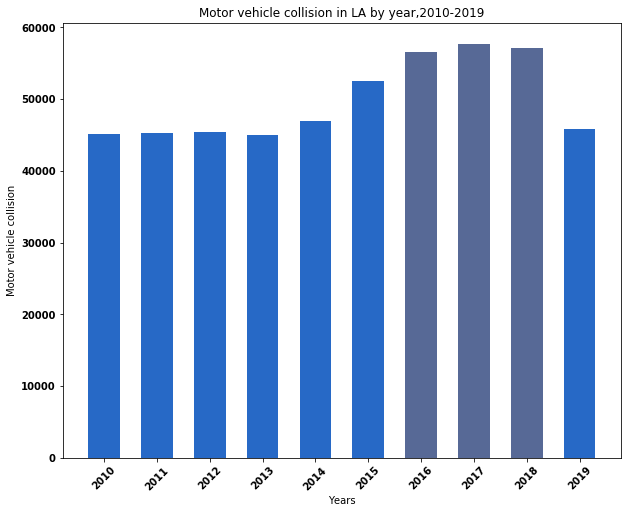

In [5]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize=(10,8))
List_num_year=[Num_2010,Num_2011,Num_2012,Num_2013,Num_2014,Num_2015,Num_2016,Num_2017,Num_2018,Num_2019]
Name_year=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
y_axis=List_num_year
x_axis=np.arange(0, len(Name_year))
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
colors = ['b','b','b','b','b','b','r','r','r','b']
plt.xlabel("Years")
plt.ylabel("Motor vehicle collision")
plt.title("Motor vehicle collision in LA by year,2010-2019")
plt.xticks(tick_locations, Name_year,rotation=45)
plt.bar(x_axis, y_axis, color=colors, width = 0.6, alpha=0.75, align="center")
Bar_chart_year=plt.bar(x_axis, y_axis, width = 0.6, alpha=0.75, align="center")

    

plt.savefig("Images/Num_coll_vs_years.png")

*  Displayed bar chart for motorvehicle collision in LA by month.

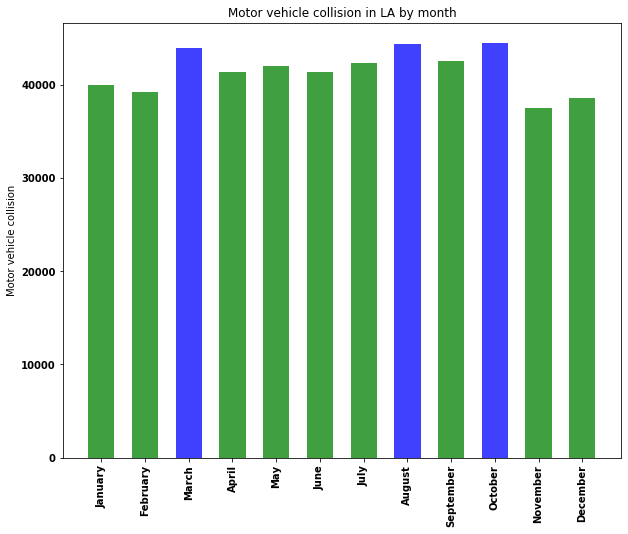

In [6]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize=(10,8))
List_num_month=[Num_January,Num_February,Num_March,Num_April,Num_May,Num_June,Num_July,Num_August,Num_September,Num_October,Num_November,Num_December]
y_axis=List_num_month
Name_months=["January","February","March","April","May","June","July","August","September","October","November","December"]
y_axis=List_num_month
x_axis=np.arange(0, len(Name_months))
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
colors = ['g','g','b','g','g','g','g','b','g','b','g','g']
plt.ylabel("Motor vehicle collision")
plt.title("Motor vehicle collision in LA by month")
plt.xticks(tick_locations, Name_months,rotation=90)
plt.bar(x_axis, y_axis, color=colors, width = 0.6, alpha=0.75, align="center")

plt.savefig("Images/Num_coll_vs_month.png")

* Because of inconsistent formatting of address column(some street types were written in full, some abbreviated, others had extra spacing or smashed together) it was more efficient to filter and count road types in the resource file and transfer the results to jupyter notebook. 
*  Calculated the number for parking lots
* Calculated percentage of collision numbers for different road types.

In [7]:
Total_count=collision_df['Address'].count()
#highways
HWY_count=15
Highway_count=4
Hy_count=3898
Highway=HWY_count+Highway_count+Hy_count

#freeways
FY_count=848
Freeway_count=34
FWY_count=67
FRWY_count=16
Freeway=FY_count+Freeway_count+FWY_count+FRWY_count
#parking
ParkingLot_count=0
UNDERGROUND_PARKING=0
MTA_PROPERTY_PARKING_LOT=0
for value in collision_df["Premise Description"]: 
    if value == "PARKING LOT":
        ParkingLot_count+=1
    elif value=="PARKING UNDERGROUND/BUILDING":
        UNDERGROUND_PARKING+=1
    elif value=="MTA PROPERTY OR PARKING LOT":
        MTA_PROPERTY_PARKING_LOT+=1
Parking=ParkingLot_count+UNDERGROUND_PARKING+MTA_PROPERTY_PARKING_LOT
Others=Total_count-(Highway+Freeway+Parking)
percent_highway=100*Highway/Total_count
percent_freeway=100*Freeway/Total_count
percent_parking=100*Parking/Total_count
percent_other_roadTypes=100*Others/Total_count



*  Displayed bar chart for motor vehicle collision in LA by road type.

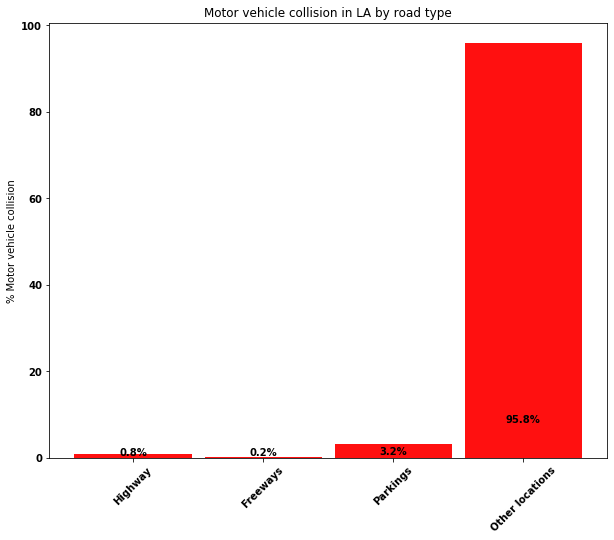

In [8]:

plt.rcParams["font.weight"] = "bold"
plt.figure(figsize=(10,8))
plt.rcParams["font.weight"] = "bold"
Percent_Roadcollision=[percent_highway,percent_freeway,percent_parking,percent_other_roadTypes]
y_axis=Percent_Roadcollision

Name_roads=["Highway","Freeways","Parkings","Other locations"]

x_axis=np.arange(0, len(Name_roads))
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)

plt.title("Motor vehicle collision in LA by road type")
plt.xticks(tick_locations, Name_roads,rotation=45)
plt.bar(x_axis, y_axis, facecolor="red", width = 0.9, alpha=0.75, align="center")
Bar_chart=plt.bar(x_axis, y_axis, facecolor="red", width = 0.9, alpha=0.75, align="center")
plt.ylabel("% Motor vehicle collision")

bars_percent=[percent_highway,percent_freeway,percent_parking,percent_other_roadTypes]

def percent_label(labels):
    for ii,label in enumerate(labels):
        height = label.get_height()
        plt.text(label.get_x()+label.get_width()/2., 0.08*height, '%s'% (round(Percent_Roadcollision[ii],1))+'%',
                ha='center', va='bottom',color='black')
percent_label(Bar_chart)

plt.savefig("Images/Num_coll_vs_roadTypes.png")

In [9]:
collision_df2 = collision_df

collision_df2['Date Reported'] = pd.to_datetime(collision_df2['Date Reported']).dt.year # to take the year
collision_df2['Date Occurred'] = pd.to_datetime(collision_df2['Date Occurred']).dt.year
collision_df2.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,190817451,2019,2019,1230,8,West LA,841,997,TRAFFIC COLLISION,NaN,...,STREET,SALTAIR AV,RHODE ISLAND ST,"{'latitude': '34.0433', 'human_address': '{""ad...",23443.0,862.0,1519.0,9.0,10.0,50.0
1,191519526,2019,2019,1310,15,N Hollywood,1554,997,TRAFFIC COLLISION,NaN,...,STREET,CULVER BL,MARINA,"{'latitude': '33.9821', 'human_address': '{""ad...",24031.0,919.0,240.0,10.0,10.0,85.0
2,192019001,2019,2019,0900,20,Olympic,2042,997,TRAFFIC COLLISION,NaN,...,STREET,9TH ST,WILTON PL,"{'latitude': '34.0559', 'human_address': '{""ad...",22722.0,611.0,888.0,NaN,7.0,86.0
3,191615731,2019,2019,0030,16,Foothill,1687,997,TRAFFIC COLLISION,NaN,...,STREET,VINELAND AV,CANTARA ST,"{'latitude': '34.2193', 'human_address': '{""ad...",19335.0,166.0,272.0,NaN,3.0,21.0
4,190918910,2019,2019,0130,9,Van Nuys,914,997,TRAFFIC COLLISION,NaN,...,STREET,ENADIA WY,NATICK AV,"{'latitude': '34.2002', 'human_address': '{""ad...",19733.0,229.0,288.0,NaN,3.0,18.0



Accident Prone locations

• Determine which area has the most amount of collisions

• 77th Street has a total of 31,404 collisions within 2010 to 2019

• Southwest has a total of 29,156 collisions within 2010 to 2019

In [10]:

location = collision_df2['Area Name'].value_counts()

location

77th Street    31404
Southwest      29156
Wilshire       28547
West LA        26936
N Hollywood    26509
Olympic        26407
Pacific        26311
Van Nuys       25195
Newton         24774
Devonshire     24483
Hollywood      24336
West Valley    24153
Northeast      22754
Mission        21724
Topanga        21675
Central        20235
Southeast      20174
Rampart        18759
Harbor         18581
Hollenbeck     18063
Foothill       17291
Name: Area Name, dtype: int64

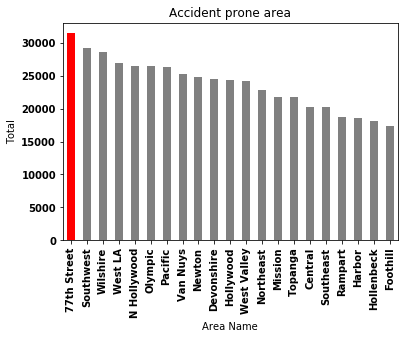

In [11]:
lst = ["#808080"] * 20
Location_chart = location.plot(kind="bar", title="Accident prone area", color = ['#ff0000'] + lst)
Location_chart.set_xlabel("Area Name")
Location_chart.set_ylabel("Total")

plt.savefig("Images/location.png",bbox_inches="tight")

Gender Demographic

• Count of Male drivers • Count of Female drivers • Count of Unknown gender drivers

Determine which gender caused the most amount of collisions

In [12]:

#Gender loop  
count_F=0
count_M=0
Total=collision_df2['Victim Sex'].count()
for gender in collision_df2['Victim Sex']:
    if gender=="F":
        count_F=count_F+1
    elif gender=="M":
        count_M=count_M+1
Others=Total-(count_F+count_M)

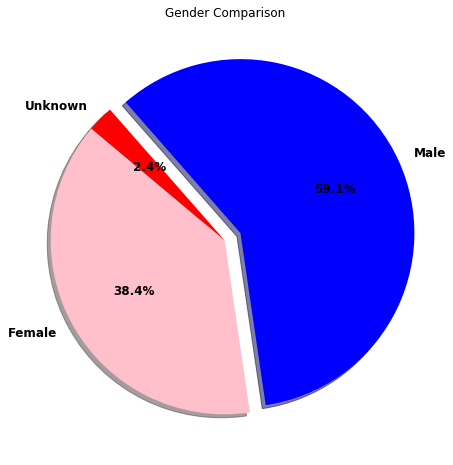

In [13]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize=(10,8))

sizes=[count_F,count_M,Others]
labels=["Female", "Male", "Unknown"]
colors=["pink", "blue", "red"]
explode=(0,0.1,0)
piechart = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140,)
for txt in piechart[2]:
    txt.set_fontsize(12)
for txt in piechart[1]:
    txt.set_fontsize(12)

plt.title("Gender Comparison")

plt.savefig("Images/gender.png",bbox_inches="tight")

In [14]:
# ######
file_to_load = "Resources/traffic_collision_LA.csv"



collision_df = pd.read_csv(file_to_load, delimiter=',', encoding="utf-8", dtype={'Time Occurred':str})
collision_df.dropna(inplace=True)


* For this section, the dataframe will be shrunken for ease of use, as well as the column headers renamed to make it easier to read.

* Dropped NaN's from the dataframe.

* Column headers will be renamed for readability.

* The Race code will be identified and replaced with the proper titles.

* All asian races will be combined, and races will be compared on a pie chart.

* The Age column will be reformatted to remove decimal point, bins created, and compared on a pie chart.

* The Date column will be reformatted for ease of reading to standard date yyyy-mm-dd, and a column will be created to capture the day of the week. This is to be compared on a bar chart.

* The Time column will be utilized to create an Hour column for hours of the day. This is to be compare on a bart chart.

In [15]:

#Shrink data frame
accident_df = collision_df.loc[:, ["Victim Descent", "Victim Age", 
                                    "Date Occurred", "Time Occurred"]]
# Reset index after shrunken dataframe and dropna applied
accident_df.reset_index(drop=True, inplace=True)

# # format age column
accident_df['Victim Age'] = accident_df['Victim Age'].apply(np.int64)

# # format date column
accident_df['Date Occurred'] = accident_df['Date Occurred'].str[:10]
accident_df.loc[:,"Date Occurred"] = accident_df["Date Occurred"].astype("datetime64[ns]")
accident_df['Day of Week'] = accident_df['Date Occurred'].dt.weekday_name

# # format time column
accident_df['Hour'] = accident_df['Time Occurred'].str[:2]

accident_df.head()

,Victim Descent,Victim Age,Date Occurred,Time Occurred,Day of Week,Hour
0,H,78,2019-10-25,0900,Friday,09
1,H,23,2019-10-25,0210,Friday,02
2,X,18,2019-10-25,0015,Friday,00
3,B,19,2019-10-25,2350,Friday,23
4,H,54,2019-10-25,0845,Friday,08


In [16]:
accident_df.columns = ["Race", "Age", "Date", "Time", "Day of Week", "Hour"]
accident_df.head()

,Race,Age,Date,Time,Day of Week,Hour
0,H,78,2019-10-25,0900,Friday,09
1,H,23,2019-10-25,0210,Friday,02
2,X,18,2019-10-25,0015,Friday,00
3,B,19,2019-10-25,2350,Friday,23
4,H,54,2019-10-25,0845,Friday,08


In [17]:
accident_df.dtypes

Race                   object
Age                     int64
Date           datetime64[ns]
Time                   object
Day of Week            object
Hour                   object
dtype: object

In [18]:
# create a dictionary and map it to the race column
race_type = {'A':'Other Asian', 'B':'Black', 'C':'Chinese', 'D':'Cambodian', 
        'F':'Filipino', 'G':'Guamanian', 
        'H':'Hispanic/Latin/Mexican', 'I':'American Indian/Alaskan Native', 
        'J':'Japanese', 'K':'Korean', 'L':'Laotian', 'O':'Other', 'P':'Pacific Islander', 
        'S':'Samoan', 'U':'Hawaiian', 'V':'Vietnamese', 'W':'White', 'X':'Unknown', 
        'Z':'Asian Indian', '-':'Unknown'}

accident_df["Race"]= accident_df["Race"].map(race_type)
accident_df.head()

,Race,Age,Date,Time,Day of Week,Hour
0,Hispanic/Latin/Mexican,78,2019-10-25,0900,Friday,09
1,Hispanic/Latin/Mexican,23,2019-10-25,0210,Friday,02
2,Unknown,18,2019-10-25,0015,Friday,00
3,Black,19,2019-10-25,2350,Friday,23
4,Hispanic/Latin/Mexican,54,2019-10-25,0845,Friday,08


In [19]:

accident_df["Race"] = accident_df["Race"].replace({"Other Asian":"Asian", "Korean":"Asian", "Chinese":"Asian", "Japanese":"Asian",
                                          "Vietnamese":"Asian", "Cambodian":"Asian", "Laotian":"Asian", "Filipino":"Islander",
                                          "Hawaiian":"Islander", "Pacific Islander":"Islander", "Guamanian":"Islander",
                                          "Samoan":"Islander", "Asian Indian":"Asian"})

accident_df.head()

,Race,Age,Date,Time,Day of Week,Hour
0,Hispanic/Latin/Mexican,78,2019-10-25,0900,Friday,09
1,Hispanic/Latin/Mexican,23,2019-10-25,0210,Friday,02
2,Unknown,18,2019-10-25,0015,Friday,00
3,Black,19,2019-10-25,2350,Friday,23
4,Hispanic/Latin/Mexican,54,2019-10-25,0845,Friday,08


In [20]:

race_list= accident_df["Race"].value_counts().index.tolist()
race_counts=accident_df["Race"].value_counts()
race_df = pd.DataFrame(race_counts, race_list)
race_df.columns = ["Number of Accidents"]
race_df["Race"] = race_df.index
race_df.reset_index(drop=True, inplace=True)

race_df

,Number of Accidents,Race
0,39391,Hispanic/Latin/Mexican
1,26670,Black
2,24182,White
3,12260,Other
4,4264,Asian
5,1871,Unknown
6,373,Islander
7,30,American Indian/Alaskan Native


The percentage for some of the race demographics were so low that displaying them caused an overlap in text. The pie chart had to be exploded in a way to make each part readable. It made for a unique looking pie chart.

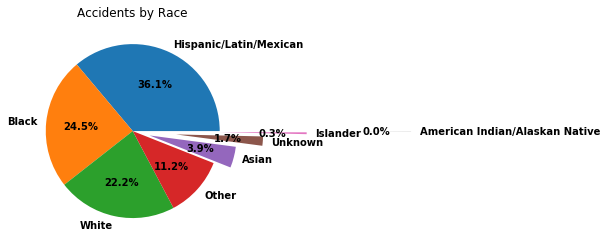

In [21]:

labels=race_df["Race"].tolist()
explode = (0, 0, 0, 0, 0.2, 0.5, 1, 2.2)
plt.pie(race_df["Number of Accidents"], explode=explode, labels = labels, 
        autopct="%1.1f%%")
plt.title("Accidents by Race")
plt.savefig("AccidentsByRace.png", type="png", dpi=100, orientation= "landscape",
           bbox_inches="tight")

Since there were so many different ages in this dataset, bins were created to group age ranges together

In [22]:
bins = [16, 26, 36, 46, 56, 66, 100 ]
labels = ["16-25", "26-35", "36-45", "46-55", "56-65", "66+"]
accident_df["Age Range"] = pd.cut(accident_df["Age"], bins, labels=labels)
accident_df.head()

,Race,Age,Date,Time,Day of Week,Hour,Age Range
0,Hispanic/Latin/Mexican,78,2019-10-25,0900,Friday,09,66+
1,Hispanic/Latin/Mexican,23,2019-10-25,0210,Friday,02,16-25
2,Unknown,18,2019-10-25,0015,Friday,00,16-25
3,Black,19,2019-10-25,2350,Friday,23,16-25
4,Hispanic/Latin/Mexican,54,2019-10-25,0845,Friday,08,46-55


In [23]:
age_list= accident_df["Age Range"].value_counts().index.tolist()
age_counts=accident_df["Age Range"].value_counts()
age_df = pd.DataFrame(age_counts, age_list)
age_df.columns = ["Number of Accidents"]
age_df["Age Range"] = age_df.index
age_df.reset_index(drop=True, inplace=True)

age_df

,Number of Accidents,Age Range
0,28491,26-35
1,21551,16-25
2,21121,36-45
3,18941,46-55
4,11442,56-65
5,7412,66+


The largest age range group was isolated to highlight the largest group

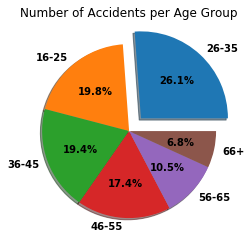

In [24]:

labels=age_df["Age Range"].tolist()
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(age_df["Number of Accidents"], explode=explode, labels = labels, shadow=True, 
        autopct="%1.1f%%")
plt.title("Number of Accidents per Age Group")
plt.savefig("AccidentsByAge.png", type="png", dpi=100, orientation= "landscape",
           bbox_inches="tight")

In [25]:

hour_list= accident_df["Hour"].value_counts().index.tolist()
hour_counts=accident_df["Hour"].value_counts()
hour_df = pd.DataFrame(hour_counts, hour_list)
hour_df.columns = ["Number of Accidents"]
hour_df["Hour"] = hour_df.index
hour_df.reset_index(drop=True, inplace=True)
hour_df = hour_df[["Hour", "Number of Accidents"]]
hour_df = hour_df.sort_values(["Hour"])
hour_df

,Hour,Number of Accidents
17,00,2436
19,01,2114
20,02,1947
22,03,1179
23,04,957
21,05,1252
18,06,2228
13,07,4629
8,08,5266
14,09,4618


The various times were compressed to each hour of the day, and those hours were renamed on the x_axis for readability

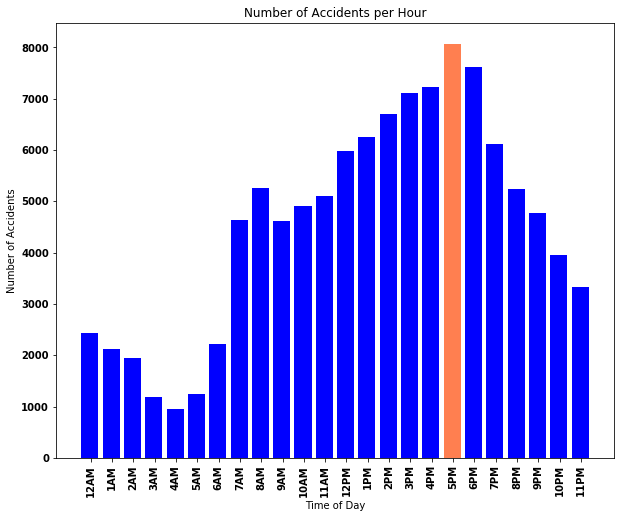

In [26]:
x_axis = np.arange(len(hour_df))
tick_locations = [value+.04 for value in x_axis]
axis_points = ["12AM","1AM", "2AM", "3AM", "4AM", "5AM", "6AM", "7AM", "8AM", "9AM", "10AM", 
              "11AM", "12PM", "1PM", "2PM", "3PM", "4PM", "5PM", "6PM", "7PM", "8PM", "9PM", 
              "10PM", "11PM"]
colors=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'coral', 'b', 
       'b', 'b', 'b', 'b', 'b']
plt.figure(figsize=(10,8))
plt.title("Number of Accidents per Hour")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.bar(x_axis, hour_df["Number of Accidents"], color=colors, align="center")
plt.xticks(tick_locations, axis_points, rotation="vertical")
plt.savefig("Accidents Per Hour", bbox_inches="tight")


The data is summarrized by the count of accidents per day of the week and the day with the most accidents is highlighted red

In [27]:
day_list= accident_df["Day of Week"].value_counts().index.tolist()
day_counts=accident_df["Day of Week"].value_counts()
day_df = pd.DataFrame(day_counts, day_list)
day_df.columns = ["Number of Accidents"]
day_df["Day of Week"] = day_df.index
day_df.reset_index(drop=True, inplace=True)
day_df = day_df[["Day of Week", "Number of Accidents"]]
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] 
day_df['Day of Week'] = pd.CategoricalIndex(day_df['Day of Week'], ordered=True, categories=days)
day_df = day_df.sort_values(by = ['Day of Week'])
day_df.reset_index(drop=True, inplace=True)
day_df

,Day of Week,Number of Accidents
0,Sunday,13823
1,Monday,15071
2,Tuesday,15683
3,Wednesday,15730
4,Thursday,15819
5,Friday,17496
6,Saturday,15419


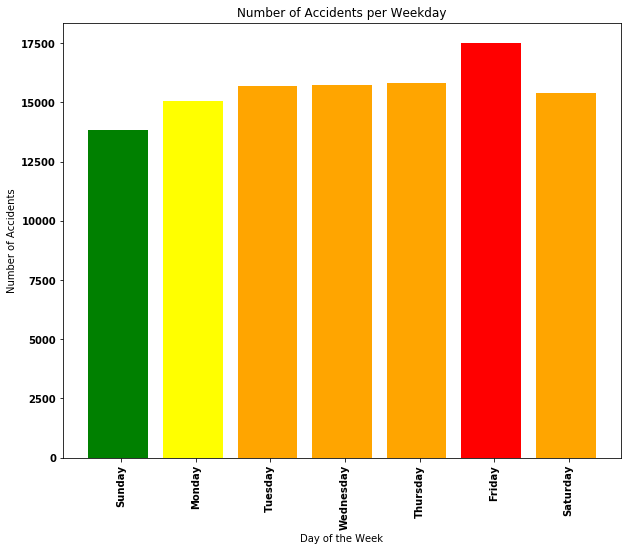

In [28]:
x_axis = np.arange(len(day_df))
tick_locations = [value+.04 for value in x_axis]
colors = ['green', 'yellow', 'orange', 'orange', 'orange', 'r', 'orange']
plt.figure(figsize=(10,8))
plt.title("Number of Accidents per Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.bar(x_axis, day_df["Number of Accidents"], color=colors, align="center")
plt.xticks(tick_locations, day_df["Day of Week"], rotation="vertical")
plt.savefig("Accidents Per Weekday", bbox_inches="tight")